In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import inspect
from datetime import datetime
import seaborn as sns
import glob
from os.path import basename
sns.set_context('poster')
import re
import csv

## Load files

In [2]:
df_hist = pandas.read_excel('../data/globalterrorismdb_0616dist.xlsx')

In [3]:
df_16 = pandas.read_excel('../data/Global Terrorism Database 2015-2016 Preliminary Data EMBARGOED.xlsx')

In [4]:
df = pandas.concat([df_hist, df_16])

In [6]:
#df['datetime'] = pandas.to_datetime((df.iyear*10000+df.imonth*100+df.iday).apply(str),format='%Y%m%d')

In [10]:
print df.iyear.max()
print df.iyear.min()

2016
1970


## Suicide attacks over time


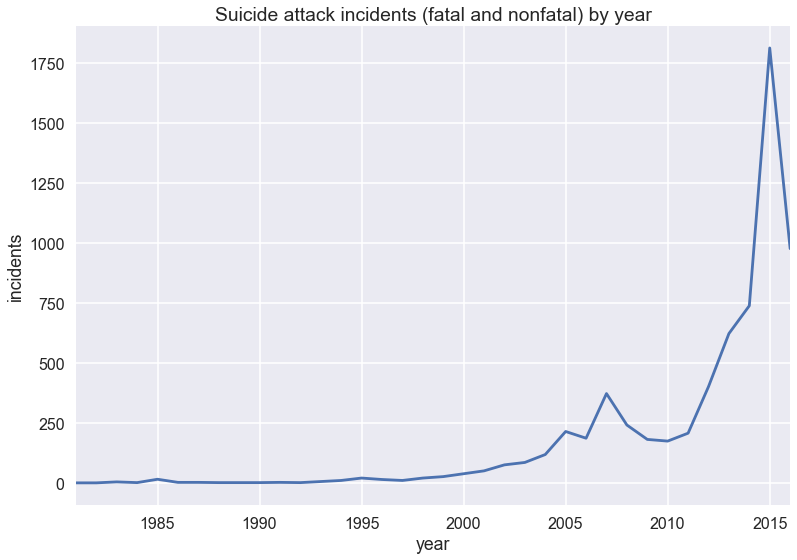

In [18]:
df[(df.suicide == 1)].groupby(['iyear']).eventid.count().plot()
plt.ylabel("incidents")
plt.title("Suicide attack incidents (fatal and nonfatal) by year")
plt.xlabel('year')

## % of suicide attacks claimed by ISIL

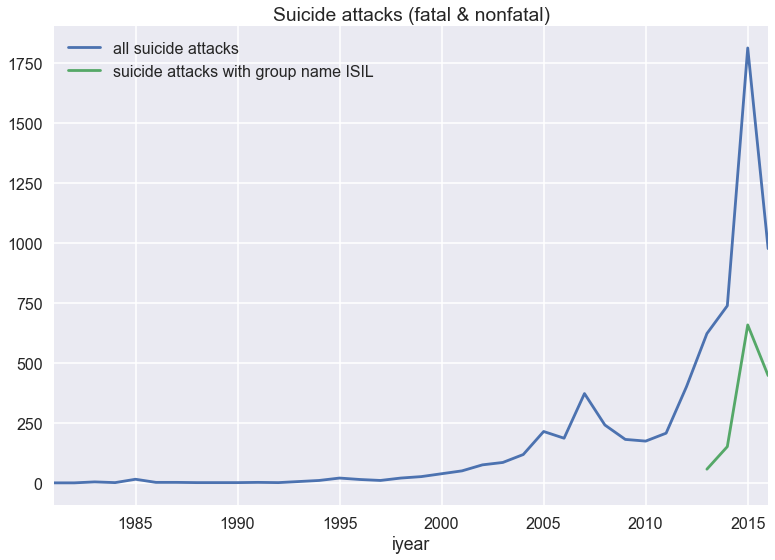

In [32]:
df[(df.suicide == 1)].groupby(['iyear']).eventid.count().plot() 
df[(df.suicide == 1) & (df.gname == 'Islamic State of Iraq and the Levant (ISIL)')].groupby(['iyear']).eventid.count().plot()
plt.legend(['all suicide attacks','suicide attacks with group name ISIL'])
plt.title("Suicide attacks (fatal & nonfatal)")

In [12]:
df[df.gname == 'Islamic State of Iraq and the Levant (ISIL)'].groupby('iyear').datetime.count()

iyear
2013     373
2014    1243
2015    2439
2016    1430
Name: datetime, dtype: int64

In [22]:
df[df.gname == 'Islamic State of Iraq and the Levant (ISIL)'][['claimed','compclaim','guncertain1']].count()

claimed        5485
compclaim        18
guncertain1    5485
dtype: int64

In [28]:
# Attacks claimed by ISIL by year
df[df.gname == 'Islamic State of Iraq and the Levant (ISIL)'].groupby(['iyear','claimed']).datetime.count().to_csv('../data/isil-claimed-by-year.csv', header=True)

In [49]:
# Attacks claimed by ISIL but uncertain by year
df[(df.gname == 'Islamic State of Iraq and the Levant (ISIL)')&(df.claimed == 1)].groupby(['iyear','guncertain1']).datetime.count().to_csv("../data/ISIL/isil-claimed-guncertain-by-year.csv",header=True)

In [50]:
 # Attacks claimed by ISIL but uncertain by year in Western Europe
df[(df.gname == 'Islamic State of Iraq and the Levant (ISIL)')&(df.region==8) &(df.claimed == 1) ].groupby(['iyear','guncertain1']).datetime.count()

iyear  guncertain1
2015   0.0            17
2016   0.0             2
Name: datetime, dtype: int64

### UK analysis

In [ ]:
# UK ONLY: Attacks claimed by ISIL by year
df[df.gname == 'Islamic State of Iraq and the Levant (ISIL)'].groupby(['iyear','claimed']).datetime.count().to_csv('../data/ISIL/isil-claimed-by-year.csv', header=True)

In [39]:
# United Kingdom gname 
df[df.country_txt=='United Kingdom'].groupby(['iyear', 'gname']).datetime.count().to_csv('../data/ISIL/uk-gnames.csv')

In [57]:
# United Kingdom attacks target/perp
df[df.country_txt=='United Kingdom'].groupby(['iyear', 'gname','target1']).datetime.count().to_csv('../data/ISIL/uk-target-perp.csv', encoding='utf8',header=True)

In [58]:
# Only fatal attacks in UK
df[(df.country_txt=='United Kingdom')&(df.nkill > 0)].groupby(['iyear', 'gname']).datetime.count().to_csv('../data/ISIL/uk-gnames-fatal-attacks-only.csv')

In [62]:
# United Kingdom attacks by weapon type ALL
df[df.country_txt=='United Kingdom'].groupby(['iyear', 'weaptype1_txt']).datetime.count().to_csv('../data/ISIL/uk-weapon-type-ALL.csv')

In [63]:
# United Kingdom attacks by weapon type FATAL
c].groupby(['iyear', 'weaptype1_txt']).datetime.count().to_csv('../data/ISIL/uk-weapon-type-fatal.csv')

In [67]:
# United Kingdom attacks SUICIDE
df[(df.country_txt=='United Kingdom')].groupby(['iyear', 'suicide']).datetime.count()

iyear  suicide
2012   0           51
2013   0          137
2014   0          103
2015   0          230
2016   0          103
Name: datetime, dtype: int64

In [68]:
 df.groupby(['iyear', 'suicide']).datetime.count()

iyear  suicide
2012   0           8096
       1            402
2013   0          11367
       1            623
2014   0          16101
       1            739
2015   0          27836
       1           1813
2016   0          12469
       1            977
Name: datetime, dtype: int64

In [77]:
df.groupby(['iyear', 'suicide']).eventid.count()

iyear  suicide
2012   0           8096
       1            402
2013   0          11367
       1            623
2014   0          16101
       1            739
2015   0          27836
       1           1813
2016   0          12469
       1            977
Name: eventid, dtype: int64

## All the data

In [69]:
df_ALL = pandas.read_excel('../data/globalterrorismdb_0616dist.xlsx')

In [82]:
df_ALL[(df_ALL.country_txt=='United Kingdom') & (df_ALL.suicide ==1)].groupby(['iyear', 'suicide']).eventid.count().to_csv('../data/ISIL/uk-suicide-attack.csv',header=True)

In [86]:
df_ALL[(df_ALL.suicide == 1)].groupby(['iyear']).eventid.count().to_csv('../data/ISIL/rise-of-suicide-attacks-global.csv', header=True)

In [91]:
#deadliness of uk attacks
df_ALL[(df_ALL.country_txt=='United Kingdom')].groupby(['iyear','nkill']).eventid.count().to_csv('../data/ISIL/uk-nkill.csv', header=True)

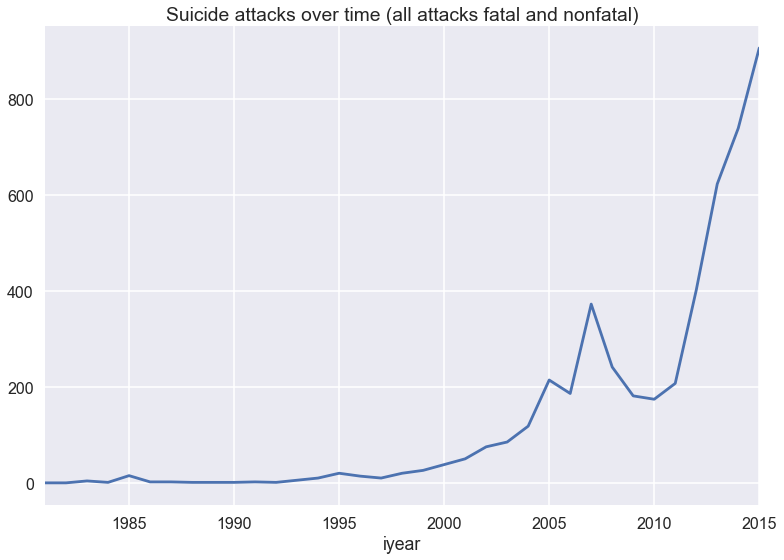

In [93]:
df_ALL[(df_ALL.suicide == 1)].groupby(['iyear']).eventid.count().plot()
plt.title('Suicide attacks over time (all attacks fatal and nonfatal)')

In [96]:
df_ALL[(df_ALL.suicide == 1)].country_txt.value_counts()

Iraq                        1815
Afghanistan                  982
Pakistan                     448
Nigeria                      211
Syria                        206
Yemen                        151
Israel                       129
Sri Lanka                    114
Somalia                      104
Russia                        79
West Bank and Gaza Strip      61
Lebanon                       60
Turkey                        44
Libya                         44
India                         32
Egypt                         31
Algeria                       29
Mali                          28
Cameroon                      23
China                         17
Saudi Arabia                  17
Chad                          13
Indonesia                     12
Morocco                       11
Bangladesh                     9
United States                  9
Iran                           8
Philippines                    8
Niger                          8
Tunisia                        7
Uzbekistan